# House Price Prediction


1. import libraries

In [15]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2. Load Dataset

In [3]:
df = pd.read_csv('house_price_prediction_ML.csv')
df.head()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
0,1360,5,3,3,26,1,9,11312334
1,4272,2,1,1,21,0,6,15604278
2,3592,3,3,3,16,2,9,17113836
3,966,1,3,2,26,0,5,6975217
4,4926,2,3,1,28,0,1,16558138


In [4]:
df.shape

(10000, 8)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Area_sqft       10000 non-null  int64
 1   Bedrooms        10000 non-null  int64
 2   Bathrooms       10000 non-null  int64
 3   Floors          10000 non-null  int64
 4   Age_of_House    10000 non-null  int64
 5   Garage          10000 non-null  int64
 6   Location_Score  10000 non-null  int64
 7   Price           10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [6]:
df.describe()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,2756.729500,2.983900,2.505500,2.00170,14.674800,1.005300,5.024500,1.293165e+07
std,1292.352479,1.413308,1.127252,0.81949,8.727019,0.815683,2.574522,4.098322e+06
min,501.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,3.026652e+06
25%,1624.000000,2.000000,1.000000,1.00000,7.000000,0.000000,3.000000,9.624321e+06
50%,2772.500000,3.000000,3.000000,2.00000,15.000000,1.000000,5.000000,1.295325e+07
75%,3873.000000,4.000000,4.000000,3.00000,22.000000,2.000000,7.000000,1.625145e+07
max,4999.000000,5.000000,4.000000,3.00000,29.000000,2.000000,9.000000,2.304416e+07


3. missing values


In [7]:
df.isnull().sum()

Area_sqft         0
Bedrooms          0
Bathrooms         0
Floors            0
Age_of_House      0
Garage            0
Location_Score    0
Price             0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
df.duplicated().sum()

np.int64(0)

4.correlation Heatmap(EDA)

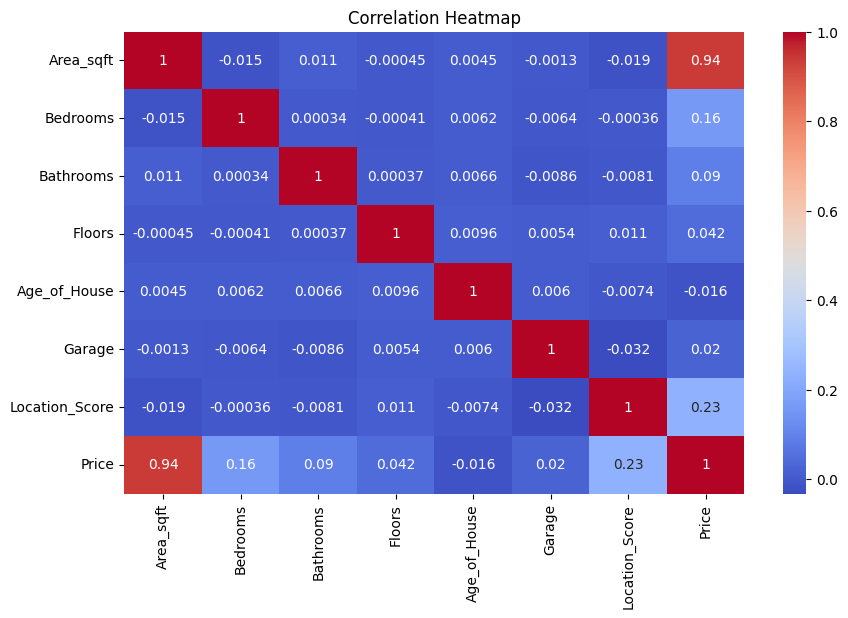

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

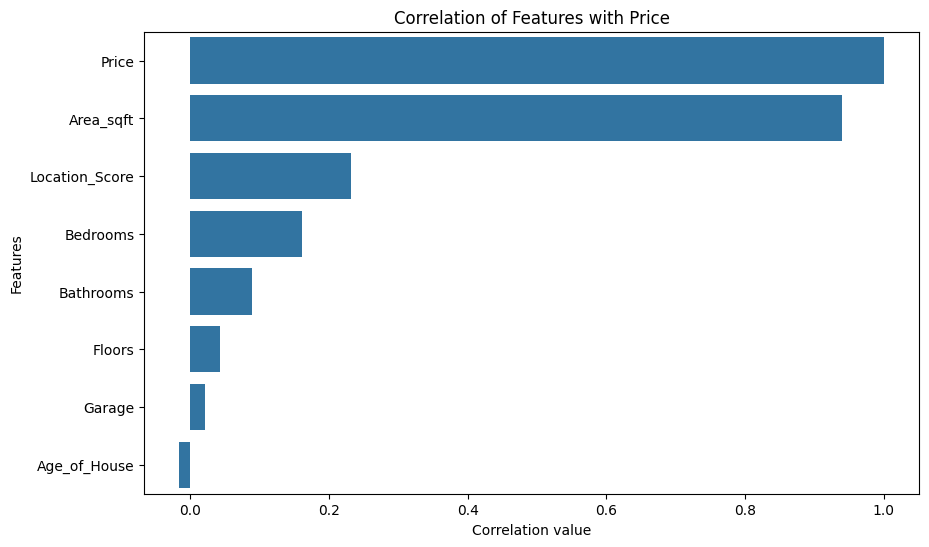

In [12]:
plt.figure(figsize=(10,6))

corr = df.corr()["Price"].sort_values(ascending=False)

sns.barplot(x=corr.values, y=corr.index)

plt.title('Correlation of Features with Price')
plt.xlabel("Correlation value")
plt.ylabel("Features")
plt.show()

#### Define features and target

In [13]:
x=df.drop('Price', axis=1)
y=df['Price']

#### Train-Test split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
    )

#### Model training

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

Create Model Dictionary

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

Train + Evaluate All Models

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = []

for name, model in models.items():
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

print(results_df)

               Model           MAE          RMSE  R2 Score
1              Ridge  3.998369e+05  5.020290e+05  0.984867
2              Lasso  3.998392e+05  5.020311e+05  0.984867
0  Linear Regression  3.998392e+05  5.020312e+05  0.984867
5  Gradient Boosting  4.239772e+05  5.282364e+05  0.983246
4      Random Forest  4.726034e+05  5.838542e+05  0.979532
6        Extra Trees  4.763863e+05  5.896114e+05  0.979126
3      Decision Tree  6.787017e+05  8.558956e+05  0.956015
8                KNN  9.956779e+05  1.238367e+06  0.907920
7                SVR  3.461505e+06  4.080554e+06  0.000216


Here are your top models

Pick best Model


In [27]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
print(f"\nBest Model is:{best_model_name}")


Best Model is:Ridge


Save Best Model


In [35]:
import os
import pickle

# check where we are saving
print("Current working directory:", os.getcwd())

# ensure model directory exists and save
os.makedirs("model", exist_ok=True)
file_path = os.path.join("model", "model.pkl")

with open(file_path, "wb") as f:
    pickle.dump(best_model, f)
    print("Model saved successfully at:", file_path)

Current working directory: c:\Users\Juveria\OneDrive\Desktop\edunet regression project
Model saved successfully at: model\model.pkl


In [38]:
pip install streamlit


   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.1 MB 268.4 kB/s eta 0:00:33
   -- ------------------------------------- 0.5/9.1 MB 268.4 kB/s eta 0:00:33
   -- ----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
